In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import importlib
import datetime as dt
from datetime import datetime
from pandas import concat
from math import sqrt
from sklearn import preprocessing
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
from sklearn import preprocessing as prep
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_pinball_loss as pinball

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, make_scorer
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import check_array
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from epftoolbox.evaluation import sMAPE
# from epftoolbox.evaluation import MAPE 
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl

In [2]:
date_format="%m/%d/%Y %H:%M"
date_parse = lambda date: dt.datetime.strptime(date, date_format)

In [3]:
dat1 = pd.read_csv("/home/ciaran/Quantile_test.csv")


dat1=pd.DataFrame(dat1)
dat1

,lag_2y,lag_3y,lag_4y,lag_5y,lag_6y,lag_7y,lag_8y,lag_9y,lag_10y,lag_11y,...,lag_8y_Forecast_90,lag_9y_Forecast_90,lag_10y_Forecast_90,lag_11y_Forecast_90,lag_12y_Forecast_90,lag_13y_Forecast_90,lag_14y_Forecast_90,lag_15y_Forecast_90,lag_16y_Forecast_90,lag_17y_Forecast_90
0,187.63,140.06,194.62,40.34,30.91,100.34,19.44,46.23,79.54,175.37,...,77.442619,81.401772,82.273346,69.326080,54.265701,48.429466,44.206093,47.222485,51.350166,59.296074
1,64.04,38.06,151.67,52.40,13.84,34.61,45.66,47.94,38.07,44.76,...,259.344635,285.080627,241.310776,177.591644,117.526321,98.925697,82.660118,69.085876,69.183990,65.718796
2,13.46,13.23,14.00,8.05,17.02,15.79,15.64,14.75,11.07,8.39,...,21.926525,24.994215,21.703758,21.957613,25.887508,28.647030,30.618124,35.014252,37.468475,46.621185
3,141.59,76.26,47.00,47.00,41.39,37.47,61.09,59.52,44.62,31.88,...,51.857136,56.587059,53.383289,52.352581,54.893120,58.561863,54.204636,53.183575,45.231953,47.025391
4,15.51,9.70,92.15,38.36,71.71,9.71,8.05,11.08,18.31,17.02,...,64.683807,65.720184,62.858936,56.905319,50.484402,44.826263,44.530487,45.909283,36.499298,36.752514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,42.10,29.83,105.86,40.81,27.02,26.94,35.15,26.73,27.17,27.00,...,51.955925,52.198532,50.112919,54.193371,51.530807,54.296371,63.516827,65.916168,75.821877,77.981850
274,36.16,28.57,27.50,27.73,27.29,27.23,26.87,26.80,27.94,27.36,...,57.232239,63.385796,68.357841,68.915604,70.981339,73.639946,79.969193,76.949699,83.136086,71.362770
275,30.96,-77.59,-289.64,-235.32,32.09,30.41,20.68,22.29,24.16,34.16,...,32.792240,39.583164,46.478409,53.965145,56.609493,59.655018,66.135201,70.290382,77.183990,85.407722
276,38.59,110.90,29.34,28.92,51.55,63.65,50.36,40.42,34.80,26.81,...,82.231583,115.170853,132.184250,154.435974,148.943756,138.110901,124.658707,111.699814,103.505165,89.110832


In [17]:
lag_2y1_Forecast_10=dat1['lag_2y_Forecast_10']
lag_2y1_Forecast_10=lag_2y1_Forecast_10.dropna()
lag_3y1_Forecast_10=dat1['lag_3y_Forecast_10']
lag_3y1_Forecast_10=lag_3y1_Forecast_10.dropna()
lag_4y1_Forecast_10=dat1['lag_4y_Forecast_10']
lag_4y1_Forecast_10=lag_4y1_Forecast_10.dropna()
lag_5y1_Forecast_10=dat1['lag_5y_Forecast_10']
lag_5y1_Forecast_10=lag_5y1_Forecast_10.dropna()
lag_6y1_Forecast_10=dat1['lag_6y_Forecast_10']
lag_6y1_Forecast_10=lag_6y1_Forecast_10.dropna()
lag_7y1_Forecast_10=dat1['lag_7y_Forecast_10']
lag_7y1_Forecast_10=lag_7y1_Forecast_10.dropna()
lag_8y1_Forecast_10=dat1['lag_8y_Forecast_10']
lag_8y1_Forecast_10=lag_8y1_Forecast_10.dropna()
lag_9y1_Forecast_10=dat1['lag_9y_Forecast_10']
lag_9y1_Forecast_10=lag_9y1_Forecast_10.dropna()
lag_10y1_Forecast_10=dat1['lag_10y_Forecast_10']
lag_10y1_Forecast_10=lag_10y1_Forecast_10.dropna()
lag_11y1_Forecast_10=dat1['lag_11y_Forecast_10']
lag_11y1_Forecast_10=lag_11y1_Forecast_10.dropna()
lag_12y1_Forecast_10=dat1['lag_12y_Forecast_10']
lag_12y1_Forecast_10=lag_12y1_Forecast_10.dropna()
lag_13y1_Forecast_10=dat1['lag_13y_Forecast_10']
lag_13y1_Forecast_10=lag_13y1_Forecast_10.dropna()
lag_14y1_Forecast_10=dat1['lag_14y_Forecast_10']
lag_14y1_Forecast_10=lag_14y1_Forecast_10.dropna()
lag_15y1_Forecast_10=dat1['lag_15y_Forecast_10']
lag_15y1_Forecast_10=lag_15y1_Forecast_10.dropna()
lag_16y1_Forecast_10=dat1['lag_16y_Forecast_10']
lag_16y1_Forecast_10=lag_16y1_Forecast_10.dropna()
lag_17y1_Forecast_10=dat1['lag_17y_Forecast_10']
lag_17y1_Forecast=lag_17y1_Forecast_10.dropna()
pred_nn1=pd.concat([lag_2y1_Forecast_10, lag_3y1_Forecast_10, lag_4y1_Forecast_10, lag_5y1_Forecast_10, lag_6y1_Forecast_10, lag_7y1_Forecast_10,
               lag_8y1_Forecast_10, lag_9y1_Forecast_10, lag_10y1_Forecast_10, lag_11y1_Forecast_10, lag_12y1_Forecast_10, 
               lag_13y1_Forecast_10, lag_14y1_Forecast_10, lag_15y1_Forecast_10, lag_16y1_Forecast_10, lag_17y1_Forecast_10], axis=1)

lag_2y1_Forecast_50=dat1['lag_2y_Forecast_50']
lag_2y1_Forecast_50=lag_2y1_Forecast_50.dropna()
lag_3y1_Forecast_50=dat1['lag_3y_Forecast_50']
lag_3y1_Forecast_50=lag_3y1_Forecast_50.dropna()
lag_4y1_Forecast_50=dat1['lag_4y_Forecast_50']
lag_4y1_Forecast_50=lag_4y1_Forecast_50.dropna()
lag_5y1_Forecast_50=dat1['lag_5y_Forecast_50']
lag_5y1_Forecast_50=lag_5y1_Forecast_50.dropna()
lag_6y1_Forecast_50=dat1['lag_6y_Forecast_50']
lag_6y1_Forecast_50=lag_6y1_Forecast_50.dropna()
lag_7y1_Forecast_50=dat1['lag_7y_Forecast_50']
lag_7y1_Forecast_50=lag_7y1_Forecast_50.dropna()
lag_8y1_Forecast_50=dat1['lag_8y_Forecast_50']
lag_8y1_Forecast_50=lag_8y1_Forecast_50.dropna()
lag_9y1_Forecast_50=dat1['lag_9y_Forecast_50']
lag_9y1_Forecast_50=lag_9y1_Forecast_50.dropna()
lag_10y1_Forecast_50=dat1['lag_10y_Forecast_50']
lag_10y1_Forecast_50=lag_10y1_Forecast_50.dropna()
lag_11y1_Forecast_50=dat1['lag_11y_Forecast_50']
lag_11y1_Forecast_50=lag_11y1_Forecast_50.dropna()
lag_12y1_Forecast_50=dat1['lag_12y_Forecast_50']
lag_12y1_Forecast_50=lag_12y1_Forecast_50.dropna()
lag_13y1_Forecast_50=dat1['lag_13y_Forecast_50']
lag_13y1_Forecast_50=lag_13y1_Forecast_50.dropna()
lag_14y1_Forecast_50=dat1['lag_14y_Forecast_50']
lag_14y1_Forecast_50=lag_14y1_Forecast_50.dropna()
lag_15y1_Forecast_50=dat1['lag_15y_Forecast_50']
lag_15y1_Forecast_50=lag_15y1_Forecast_50.dropna()
lag_16y1_Forecast_50=dat1['lag_16y_Forecast_50']
lag_16y1_Forecast_50=lag_16y1_Forecast_50.dropna()
lag_17y1_Forecast_50=dat1['lag_17y_Forecast_50']
lag_17y1_Forecast_50=lag_17y1_Forecast_50.dropna()
pred_nn2=pd.concat([lag_2y1_Forecast_50, lag_3y1_Forecast_50, lag_4y1_Forecast_50, lag_5y1_Forecast_50, lag_6y1_Forecast_50, lag_7y1_Forecast_50,
               lag_8y1_Forecast_50, lag_9y1_Forecast_50, lag_10y1_Forecast_50, lag_11y1_Forecast_50, lag_12y1_Forecast_50, 
               lag_13y1_Forecast_50, lag_14y1_Forecast_50, lag_15y1_Forecast_50, lag_16y1_Forecast_50, lag_17y1_Forecast_50], axis=1)

lag_2y1_Forecast_90=dat1['lag_2y_Forecast_90']
lag_2y1_Forecast_90=lag_2y1_Forecast_90.dropna()
lag_3y1_Forecast_90=dat1['lag_3y_Forecast_90']
lag_3y1_Forecast_90=lag_3y1_Forecast_90.dropna()
lag_4y1_Forecast_90=dat1['lag_4y_Forecast_90']
lag_4y1_Forecast_90=lag_4y1_Forecast_90.dropna()
lag_5y1_Forecast_90=dat1['lag_5y_Forecast_90']
lag_5y1_Forecast_90=lag_5y1_Forecast_90.dropna()
lag_6y1_Forecast_90=dat1['lag_6y_Forecast_90']
lag_6y1_Forecast_90=lag_6y1_Forecast_90.dropna()
lag_7y1_Forecast_90=dat1['lag_7y_Forecast_90']
lag_7y1_Forecast_90=lag_7y1_Forecast_90.dropna()
lag_8y1_Forecast_90=dat1['lag_8y_Forecast_90']
lag_8y1_Forecast_90=lag_8y1_Forecast_90.dropna()
lag_9y1_Forecast_90=dat1['lag_9y_Forecast_90']
lag_9y1_Forecast_90=lag_9y1_Forecast_90.dropna()
lag_10y1_Forecast_90=dat1['lag_10y_Forecast_90']
lag_10y1_Forecast_90=lag_10y1_Forecast_90.dropna()
lag_11y1_Forecast_90=dat1['lag_11y_Forecast_90']
lag_11y1_Forecast_90=lag_11y1_Forecast_90.dropna()
lag_12y1_Forecast_90=dat1['lag_12y_Forecast_90']
lag_12y1_Forecast_90=lag_12y1_Forecast_90.dropna()
lag_13y1_Forecast_90=dat1['lag_13y_Forecast_90']
lag_13y1_Forecast_90=lag_13y1_Forecast_90.dropna()
lag_14y1_Forecast_90=dat1['lag_14y_Forecast_90']
lag_14y1_Forecast_90=lag_14y1_Forecast_90.dropna()
lag_15y1_Forecast_90=dat1['lag_15y_Forecast_90']
lag_15y1_Forecast_90=lag_15y1_Forecast_90.dropna()
lag_16y1_Forecast_90=dat1['lag_16y_Forecast_90']
lag_16y1_Forecast_90=lag_16y1_Forecast_90.dropna()
lag_17y1_Forecast_90=dat1['lag_17y_Forecast_90']
lag_17y1_Forecast_90=lag_17y1_Forecast_90.dropna()
pred_nn3=pd.concat([lag_2y1_Forecast_90, lag_3y1_Forecast_90, lag_4y1_Forecast_90, lag_5y1_Forecast_90, lag_6y1_Forecast_90, lag_7y1_Forecast_90,
               lag_8y1_Forecast_90, lag_9y1_Forecast_90, lag_10y1_Forecast_90, lag_11y1_Forecast_90, lag_12y1_Forecast_90, 
               lag_13y1_Forecast_90, lag_14y1_Forecast_90, lag_15y1_Forecast_90, lag_16y1_Forecast_90, lag_17y1_Forecast_90], axis=1)



lag_2y1=dat1['lag_2y']
lag_2y1=lag_2y1.dropna()
lag_3y1=dat1['lag_3y']
lag_3y1=lag_3y1.dropna()
lag_4y1=dat1['lag_4y']
lag_4y1=lag_4y1.dropna()
lag_5y1=dat1['lag_5y']
lag_5y1=lag_5y1.dropna()
lag_6y1=dat1['lag_6y']
lag_6y1=lag_6y1.dropna()
lag_7y1=dat1['lag_7y']
lag_7y1=lag_7y1.dropna()
lag_8y1=dat1['lag_8y']
lag_8y1=lag_8y1.dropna()
lag_9y1=dat1['lag_9y']
lag_9y1=lag_9y1.dropna()
lag_10y1=dat1['lag_10y']
lag_10y1=lag_10y1.dropna()
lag_11y1=dat1['lag_11y']
lag_11y1=lag_11y1.dropna()
lag_12y1=dat1['lag_12y']
lag_12y1=lag_12y1.dropna()
lag_13y1=dat1['lag_13y']
lag_13y1=lag_13y1.dropna()
lag_14y1=dat1['lag_14y']
lag_14y1=lag_14y1.dropna()
lag_15y1=dat1['lag_15y']
lag_15y1=lag_15y1.dropna()
lag_16y1=dat1['lag_16y']
lag_16y1=lag_16y1.dropna()
lag_17y1=dat1['lag_17y']
lag_17y1=lag_17y1.dropna()
Y_test1=pd.concat([lag_2y1, lag_3y1, lag_4y1, lag_5y1, lag_6y1, lag_7y1,lag_8y1, lag_9y1, lag_10y1, lag_11y1, lag_12y1, 
               lag_13y1, lag_14y1, lag_15y1, lag_16y1, lag_17y1], axis=1)

np.errstate(divide='ignore',invalid='ignore')


mse1= mean_squared_error(Y_test1, pred_nn1)
rmse1 = sqrt(mse1)
mae1 = mean_absolute_error(Y_test1, pred_nn1)
pinball1=pinball(Y_test1, pred_nn1, alpha=0.1)
smape1 = sMAPE(Y_test1, pred_nn1)*100
Error_1 = pd.DataFrame([mse1, rmse1, mae1, pinball1, smape1]).T

mse2 = mean_squared_error(Y_test1, pred_nn2)
rmse2 = sqrt(mse2)
mae2 = mean_absolute_error(Y_test1, pred_nn2)
pinball2=pinball(Y_test1, pred_nn2, alpha=0.5)
smape2 = sMAPE(Y_test1, pred_nn2)*100
Error_2 = pd.DataFrame([mse2, rmse2, mae2, pinball2, smape2]).T

mse3 = mean_squared_error(Y_test1, pred_nn3)
rmse3 = sqrt(mse3)
mae3 = mean_absolute_error(Y_test1, pred_nn3)
pinball3=pinball(Y_test1, pred_nn3, alpha=0.9)
smape3 = sMAPE(Y_test1, pred_nn3)*100
Error_3 = pd.DataFrame([mse3, rmse3, mae3, pinball3, smape3]).T

print(pred_nn1.shape)
print(pred_nn2.shape)
print(pred_nn3.shape)

print(Y_test1.shape)

print(Error_1)
print(Error_2)
print(Error_3)

(278, 16)
(278, 16)
(278, 16)
(278, 16)
             0          1          2        3         4
0  2414.563806  49.138211  30.071413  6.73354  94.43883
             0          1          2          3          4
0  1973.622022  44.425466  27.651991  13.825995  76.645004
             0          1          2          3          4
0  2661.265472  51.587455  36.178668  10.735032  82.230528


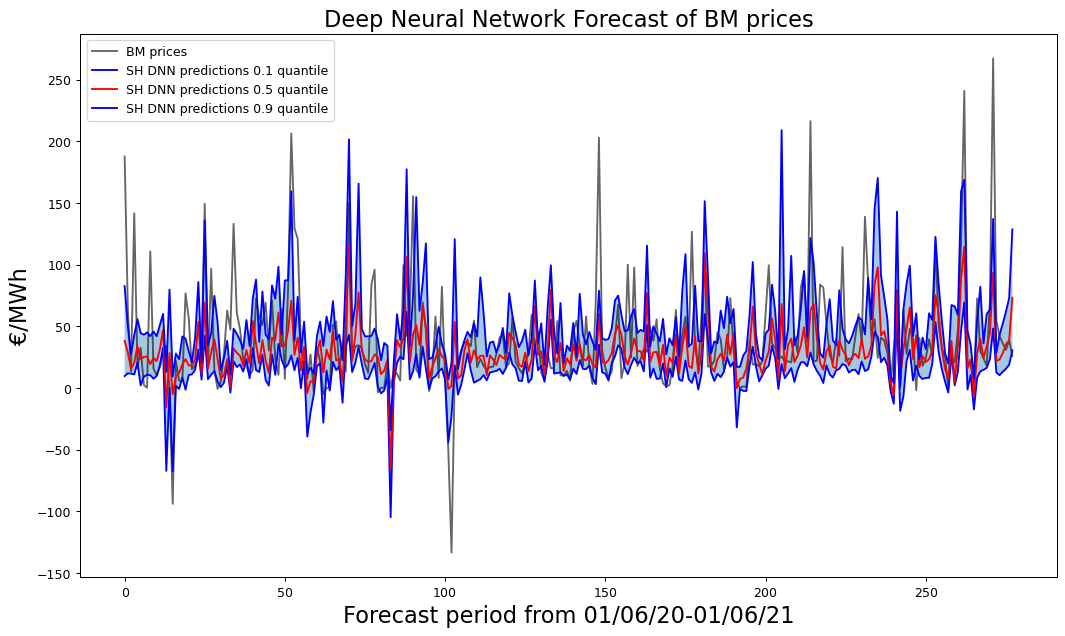

In [5]:
p1=pd.DataFrame(pred_nn1['lag_2y_Forecast_10'])
p1=p1.reset_index(drop=True)
p2=pd.DataFrame(pred_nn2['lag_2y_Forecast_50'])
p2=p2.reset_index(drop=True)
p3=pd.DataFrame(pred_nn3['lag_2y_Forecast_90'])
p3=p3.reset_index(drop=True)
y1=Y_test1['lag_2y']
y1=y1.reset_index(drop=True)

p1=p1.values.ravel()
p2=p2.values.ravel()
p3=p3.values.ravel()

                       
figure(figsize = (14, 8), dpi = 90)
plt.plot(y1, color='black', label='BM prices', alpha=0.6)
plt.plot(p1, color='blue', label='SH DNN predictions 0.1 quantile')
plt.plot(p2, color='red', label='SH DNN predictions 0.5 quantile')
plt.plot(p3, color='blue', label='SH DNN predictions 0.9 quantile')
plt.fill_between(np.arange(0,len(Y_test1),1), p1, p3, alpha=0.4)


plt.xlabel('Forecast period from 01/06/20-01/06/21',fontsize=18)
plt.ylabel('€/MWh', fontsize=18)
plt.title("Deep Neural Network Forecast of BM prices", fontsize=18)
# plt.xlim([0, 1000])
# plt.ylim([-100,300])
plt.legend()
# plt.savefig('SH_DNN.png', transparent=False, format="jpg")

In [6]:
# sklearn.metrics.mean_pinball_loss(y_true, y_pred, *, sample_weight=None, alpha=0.5, multioutput='uniform_average')

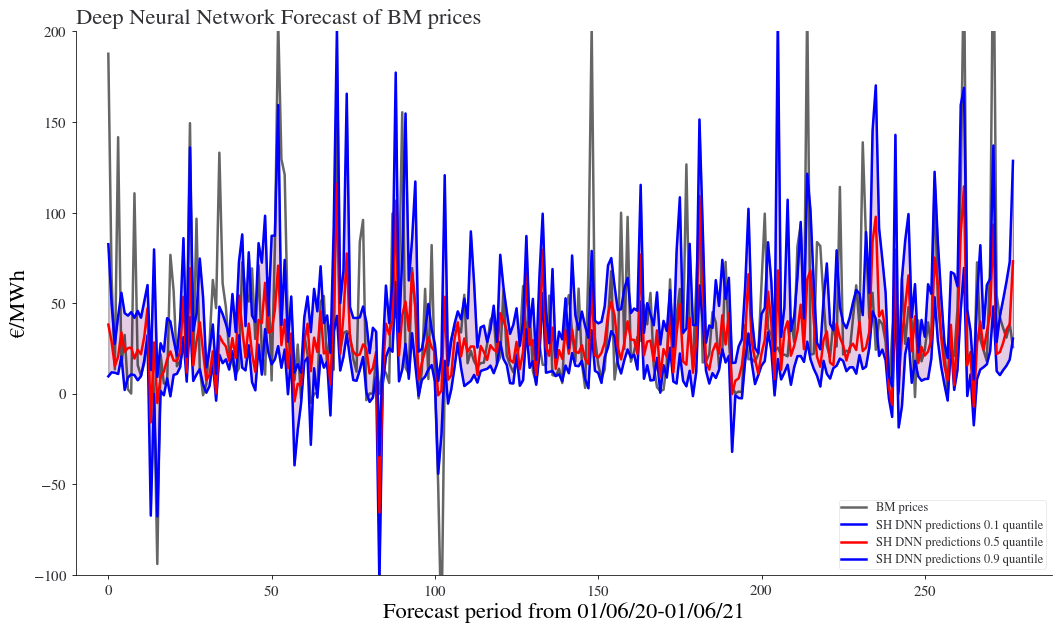

In [7]:
plt.style.use('plot_style.txt')
#=========================================================== # Directory and filename; style file open #=========================================================== # Change to the directory which contains the current script 
dirFile = os.path.dirname(os.path.join('YourDirHere',
                          'NicePlotProductivity.py'))
# Load style file plt.style.use(os.path.join(dirFile, 'PaperDoubleFig.mplstyle'))
# Make some style choices for plotting 
colourWheel =['#329932',
            '#ff6961',
            'b',
            '#6a3d9a',
            '#fb9a99',
            '#e31a1c',
            '#fdbf6f',
            '#ff7f00',
            '#cab2d6',
            '#6a3d9a',
            '#ffff99',
            '#b15928',
            '#67001f',
            '#b2182b',
            '#d6604d',
            '#f4a582',
            '#fddbc7',
            '#f7f7f7',
            '#d1e5f0',
            '#92c5de',
            '#4393c3',
            '#2166ac',
            '#053061']
dashesStyles = [[3,1],
            [1000,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1]]
# Point to the data fileName = 'rftxlicp1017unlinked.xls'
p1=pd.DataFrame(pred_nn1['lag_2y_Forecast_10'])
p1=p1.reset_index(drop=True)
p2=pd.DataFrame(pred_nn2['lag_2y_Forecast_50'])
p2=p2.reset_index(drop=True)
p3=pd.DataFrame(pred_nn3['lag_2y_Forecast_90'])
p3=p3.reset_index(drop=True)
y1=Y_test1['lag_2y']
y1=y1.reset_index(drop=True)

p1=p1.values.ravel()
p2=p2.values.ravel()
p3=p3.values.ravel()

                       
figure(figsize = (14, 8), dpi = 90)
plt.plot(y1, color='black', label='BM prices', alpha=0.6)
plt.plot(p1, color='blue', label='SH DNN predictions 0.1 quantile')
plt.plot(p2, color='red', label='SH DNN predictions 0.5 quantile')
plt.plot(p3, color='blue', label='SH DNN predictions 0.9 quantile')
plt.fill_between(np.arange(0,len(Y_test1),1), p1, p3, alpha=0.4)


plt.xlabel('Forecast period from 01/06/20-01/06/21',fontsize=18)
plt.ylabel('€/MWh', fontsize=18)
plt.title("Deep Neural Network Forecast of BM prices", fontsize=18)
plt.xlim([-10, 289])
plt.ylim([-100,200])
plt.legend()
# plt.savefig('SH_DNN.png', transparent=False, format="jpg")